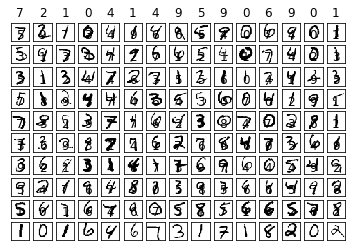

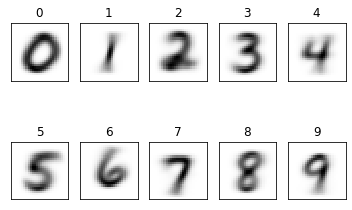

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


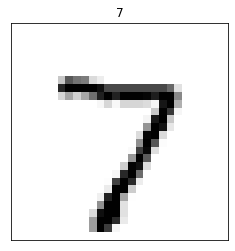

In [40]:
label       = list_label[0]
im_vector   = list_image[:, 0]
im_matrix   = im_vector.reshape((size_row, size_col))

plt.title(label)
plt.imshow(im_matrix, cmap='Greys', interpolation='None')

frame   = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.show()

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


In [73]:
col_train_j = []
col_test_j = []
col_train_acc = []
col_test_acc = []

num_iter = 100
num_train = 6000
num_test = 4000

w = np.random.normal(0,1,[785,10])

for iteration in range(num_iter):
    
    sum_train_j = 0
    sum_test_j = 0
    sum_train_acc = 0
    sum_test_acc = 0
    
    for train in range(num_train):
    
        input_v = np.append(list_image[:,train],1)
        input_v = np.reshape(input_v, (-1, len(input_v)))
        
        actual_l = np.zeros(10)
        actual_l[list_label[train]] = 1
        
        h_ = input_v.dot(w)
        h = sigmoid(h_) 
        
        dl_dh = -actual_l/h + (1.0 - actual_l)/(1.0 - h)
        dl_dh = np.reshape(dl_dh,(-1,10))
        
        dh_dhh = sigmoid(h_)*(1 - sigmoid(h_))
        dh_dhh = np.reshape(dh_dhh,(-1,10))
        
        sigma = dl_dh*dh_dhh
        sigma = np.reshape(sigma,(10,-1))
        
        dl_dw = sigma.dot(input_v)
        dl_dw = np.transpose(dl_dw)
        
        w = w - 0.01*dl_dw
        
        sum_train_j += np.sum( -actual_l * np.log(h) - (1 - actual_l) * np.log(1 - h))
        
        output_l = np.zeros(10)
        output_l[np.argmax(h)] = 1
        
        dE_dh = actual_l - output_l
        
        if np.sum(dE_dh**2) == 0:
            sum_train_acc += 1
        
    for test in range(num_train + 1, num_train + num_test):
        
        input_v = np.append(list_image[:,test],1)
        input_v = np.reshape(input_v, (-1, len(input_v)))
        
        actual_l = np.zeros(10)
        actual_l[list_label[test]] = 1
        
        h_ = input_v.dot(w)
        h = sigmoid(h_) 
        
        sum_test_j += np.sum( -actual_l * np.log(h) - (1 - actual_l) * np.log(1 - h))
        output_l = np.zeros(10)
        output_l[np.argmax(h)] = 1
        
        dE_dh = actual_l - output_l
        if np.sum(dE_dh**2) == 0:
            sum_test_acc += 1
        
        
        
    col_train_j.append(sum_train_j/num_train)
    col_test_j.append(sum_test_j/num_test)
    col_train_acc.append(sum_train_acc/num_train)
    col_test_acc.append(sum_test_acc/num_test)
      

print('trained')

trained


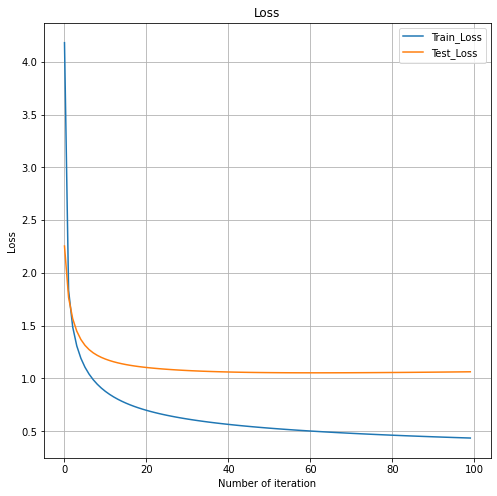

In [74]:
plt.figure(figsize=(8,8))
plt.plot(col_train_j)
plt.plot(col_test_j)
plt.title('Loss')
plt.legend(['Train_Loss','Test_Loss'])
plt.ylabel('Loss')
plt.xlabel('Number of iteration')

plt.grid()
plt.show()



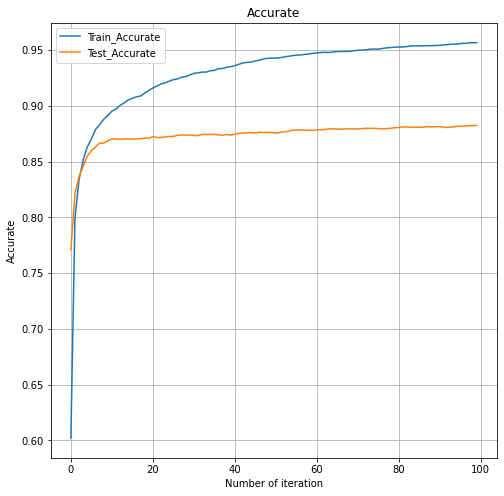


	 Training Accurate: 0.9565  Testing Accurate: 0.8822


In [75]:
plt.figure(figsize=(8,8))
plt.plot(col_train_acc)
plt.plot(col_test_acc)
plt.grid()
plt.title('Accurate')
plt.legend(['Train_Accurate','Test_Accurate'])
plt.ylabel('Accurate')
plt.xlabel('Number of iteration')

plt.show()

print()
print('\t Training Accurate: %.4f  Testing Accurate: %.4f' % (col_train_acc[-1], col_test_acc[-1]))




In [ ]:
print(np.max(w))

# print(w[:,200])

print(np.shape(w))

plt.plot(w)


In [45]:

for i in range(0,10):
    
    input_v = np.append(list_image[:,i],1)
    input_l = list_label[i]
    
    h_ = input_v.dot(w)
    h = sigmoid(h_) 
    print('Output: %d' % np.argmax(h))
    print('Actual Output: %d \n' % input_l)


Output: 7
Actual Output: 7 

Output: 2
Actual Output: 2 

Output: 1
Actual Output: 1 

Output: 0
Actual Output: 0 

Output: 4
Actual Output: 4 

Output: 1
Actual Output: 1 

Output: 4
Actual Output: 4 

Output: 9
Actual Output: 9 

Output: 5
Actual Output: 5 

Output: 9
Actual Output: 9 



In [39]:
aa = [1,2]
aa = np.reshape(aa,(-1,len(aa)))
bb = [1,2,3]
bb = np.reshape(bb,(-1,len(bb)))
# print(aa)
# print(bb)

bb = np.transpose(bb)
# print(bb)

cc = bb.dot(aa)
# print(cc)

# print(dl_dh)
# print(dh_dhh)

# backpropagate
# print(np.shape(list_image))
# print(l)


mm = [[1],[2],[3]]
print(mm)

nn = [[4],[5],[6]]
nn = np.array(nn)
print(nn)


oo = nn.dot(np.transpose(mm))
print(oo)



[[1], [2], [3]]
[[4]
 [5]
 [6]]
[[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]
